
=== HASIL SIMULASI SUHU OPTIMAL ===
Suhu Luar     : 27.00 °C
Suhu Dalam    : 23.00 °C
Jumlah Orang  : 9 orang
Suhu Optimal  : 21.13 °C


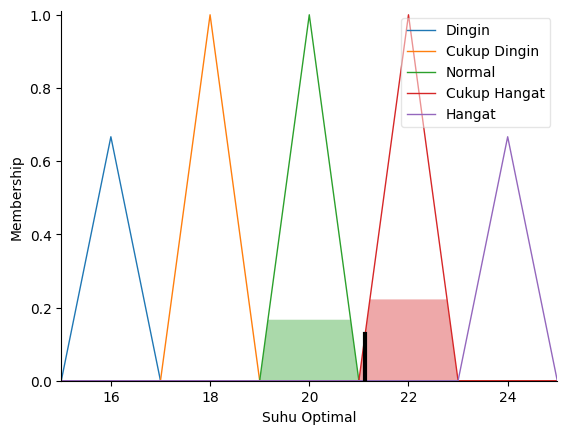

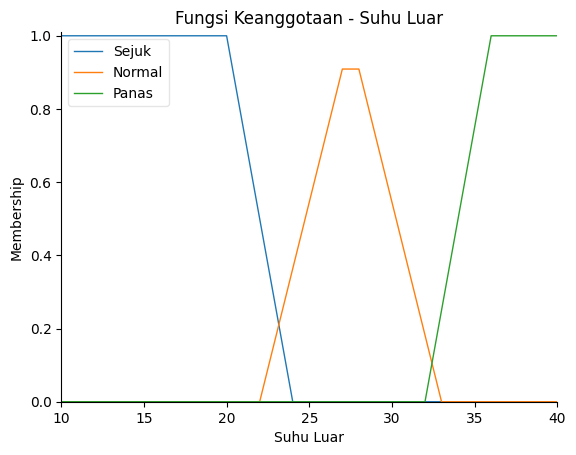

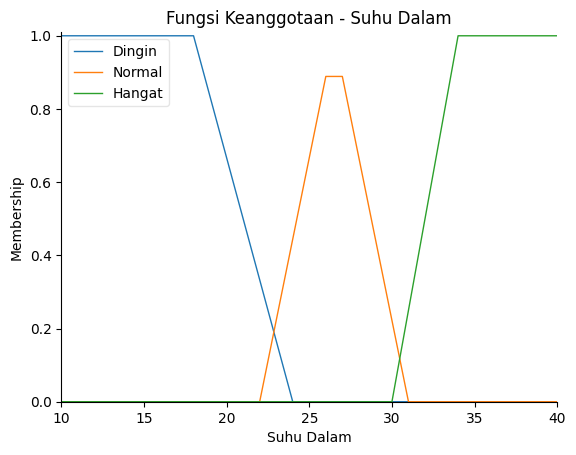

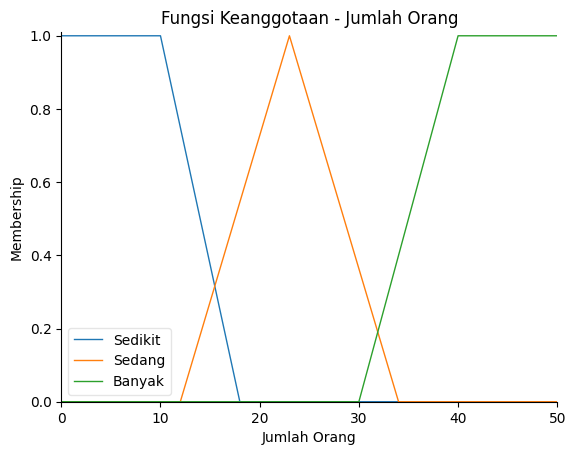

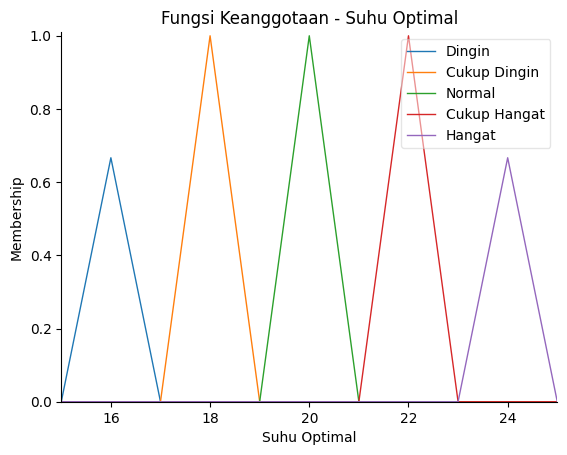

In [ ]:
    import numpy as np
    import skfuzzy as fuzz
    from skfuzzy import control as ctrl
    import matplotlib.pyplot as plt

    # Variabel input
    suhu_luar = ctrl.Antecedent(np.arange(10, 41, 1), 'Suhu Luar')
    suhu_dalam = ctrl.Antecedent(np.arange(10, 41, 1), 'Suhu Dalam')
    jumlah_orang = ctrl.Antecedent(np.arange(0, 51, 1), 'Jumlah Orang')

    # Variabel output
    suhu_optimal = ctrl.Consequent(np.arange(15, 26, 1), 'Suhu Optimal')

    # Fungsi keanggotaan Suhu Luar
    suhu_luar['Sejuk'] = fuzz.trapmf(suhu_luar.universe, [10, 10, 20, 24])
    suhu_luar['Normal'] = fuzz.trimf(suhu_luar.universe, [22, 27.5, 33])
    suhu_luar['Panas'] = fuzz.trapmf(suhu_luar.universe, [32, 36, 40, 40])

    # Fungsi keanggotaan Suhu Dalam (diperbaiki sesuai kategori)
    suhu_dalam['Dingin'] = fuzz.trapmf(suhu_dalam.universe, [10, 10, 18, 24])
    suhu_dalam['Normal'] = fuzz.trimf(suhu_dalam.universe, [22, 26.5, 31])
    suhu_dalam['Hangat'] = fuzz.trapmf(suhu_dalam.universe, [30, 34, 40, 40])

    # Fungsi keanggotaan Jumlah Orang
    jumlah_orang['Sedikit'] = fuzz.trapmf(jumlah_orang.universe, [0, 0, 10, 18])
    jumlah_orang['Sedang'] = fuzz.trimf(jumlah_orang.universe, [12, 23, 34])
    jumlah_orang['Banyak'] = fuzz.trapmf(jumlah_orang.universe, [30, 40, 50, 50])

    # Fungsi keanggotaan Suhu Optimal (rentang 15 - 25 °C)
    suhu_optimal['Dingin'] = fuzz.trimf(suhu_optimal.universe, [15, 15.5, 17])
    suhu_optimal['Cukup Dingin'] = fuzz.trimf(suhu_optimal.universe, [17, 18, 19])
    suhu_optimal['Normal'] = fuzz.trimf(suhu_optimal.universe, [19, 20, 21])
    suhu_optimal['Cukup Hangat'] = fuzz.trimf(suhu_optimal.universe, [21, 22, 23])
    suhu_optimal['Hangat'] = fuzz.trimf(suhu_optimal.universe, [23, 24.5, 25])

    # Aturan fuzzy yang disesuaikan dengan 5 kategori suhu optimal
    rules = [
        # Suhu Luar Sejuk
        ctrl.Rule(suhu_luar['Sejuk'] & suhu_dalam['Dingin'] & jumlah_orang['Sedikit'], suhu_optimal['Cukup Dingin']),
        ctrl.Rule(suhu_luar['Sejuk'] & suhu_dalam['Dingin'] & jumlah_orang['Sedang'], suhu_optimal['Normal']),
        ctrl.Rule(suhu_luar['Sejuk'] & suhu_dalam['Dingin'] & jumlah_orang['Banyak'], suhu_optimal['Cukup Hangat']),
        ctrl.Rule(suhu_luar['Sejuk'] & suhu_dalam['Normal'] & jumlah_orang['Sedikit'], suhu_optimal['Normal']),
        ctrl.Rule(suhu_luar['Sejuk'] & suhu_dalam['Normal'] & jumlah_orang['Sedang'], suhu_optimal['Cukup Hangat']),
        ctrl.Rule(suhu_luar['Sejuk'] & suhu_dalam['Normal'] & jumlah_orang['Banyak'], suhu_optimal['Hangat']),
        ctrl.Rule(suhu_luar['Sejuk'] & suhu_dalam['Hangat'] & jumlah_orang['Sedikit'], suhu_optimal['Cukup Hangat']),
        ctrl.Rule(suhu_luar['Sejuk'] & suhu_dalam['Hangat'] & jumlah_orang['Sedang'], suhu_optimal['Hangat']),
        ctrl.Rule(suhu_luar['Sejuk'] & suhu_dalam['Hangat'] & jumlah_orang['Banyak'], suhu_optimal['Hangat']),

        # Suhu Luar Normal
        ctrl.Rule(suhu_luar['Normal'] & suhu_dalam['Dingin'] & jumlah_orang['Sedikit'], suhu_optimal['Normal']),
        ctrl.Rule(suhu_luar['Normal'] & suhu_dalam['Dingin'] & jumlah_orang['Sedang'], suhu_optimal['Cukup Hangat']),
        ctrl.Rule(suhu_luar['Normal'] & suhu_dalam['Dingin'] & jumlah_orang['Banyak'], suhu_optimal['Hangat']),
        ctrl.Rule(suhu_luar['Normal'] & suhu_dalam['Normal'] & jumlah_orang['Sedikit'], suhu_optimal['Cukup Hangat']),
        ctrl.Rule(suhu_luar['Normal'] & suhu_dalam['Normal'] & jumlah_orang['Sedang'], suhu_optimal['Hangat']),
        ctrl.Rule(suhu_luar['Normal'] & suhu_dalam['Normal'] & jumlah_orang['Banyak'], suhu_optimal['Hangat']),
        ctrl.Rule(suhu_luar['Normal'] & suhu_dalam['Hangat'] & jumlah_orang['Sedikit'], suhu_optimal['Hangat']),
        ctrl.Rule(suhu_luar['Normal'] & suhu_dalam['Hangat'] & jumlah_orang['Sedang'], suhu_optimal['Hangat']),
        ctrl.Rule(suhu_luar['Normal'] & suhu_dalam['Hangat'] & jumlah_orang['Banyak'], suhu_optimal['Hangat']),

        # Suhu Luar Panas
        ctrl.Rule(suhu_luar['Panas'] & suhu_dalam['Dingin'] & jumlah_orang['Sedikit'], suhu_optimal['Cukup Dingin']),
        ctrl.Rule(suhu_luar['Panas'] & suhu_dalam['Dingin'] & jumlah_orang['Sedang'], suhu_optimal['Dingin']),
        ctrl.Rule(suhu_luar['Panas'] & suhu_dalam['Dingin'] & jumlah_orang['Banyak'], suhu_optimal['Dingin']),
        ctrl.Rule(suhu_luar['Panas'] & suhu_dalam['Normal'] & jumlah_orang['Sedikit'], suhu_optimal['Cukup Dingin']),
        ctrl.Rule(suhu_luar['Panas'] & suhu_dalam['Normal'] & jumlah_orang['Sedang'], suhu_optimal['Dingin']),
        ctrl.Rule(suhu_luar['Panas'] & suhu_dalam['Normal'] & jumlah_orang['Banyak'], suhu_optimal['Dingin']),
        ctrl.Rule(suhu_luar['Panas'] & suhu_dalam['Hangat'] & jumlah_orang['Sedikit'], suhu_optimal['Dingin']),
        ctrl.Rule(suhu_luar['Panas'] & suhu_dalam['Hangat'] & jumlah_orang['Sedang'], suhu_optimal['Dingin']),
        ctrl.Rule(suhu_luar['Panas'] & suhu_dalam['Hangat'] & jumlah_orang['Banyak'], suhu_optimal['Dingin']),

    ]

    # Sistem kontrol fuzzy
    suhu_ctrl = ctrl.ControlSystem(rules)
    suhu_simulasi = ctrl.ControlSystemSimulation(suhu_ctrl)

    # Input user
    try:
        luar = float(input("Masukkan suhu luar ruangan (10 - 40 °C): "))
        dalam = float(input("Masukkan suhu dalam ruangan (10 - 40 °C): "))
        orang = int(input("Masukkan jumlah orang (0 - 50): "))

        if not (10 <= luar <= 40 and 10 <= dalam <= 40 and 0 <= orang <= 50):
            raise ValueError("Nilai input berada di luar rentang yang diizinkan.")

        suhu_simulasi.input['Suhu Luar'] = luar
        suhu_simulasi.input['Suhu Dalam'] = dalam
        suhu_simulasi.input['Jumlah Orang'] = orang

        suhu_simulasi.compute()

        print("\n=== HASIL SIMULASI SUHU OPTIMAL ===")
        print(f"Suhu Luar     : {luar:.2f} °C")
        print(f"Suhu Dalam    : {dalam:.2f} °C")
        print(f"Jumlah Orang  : {orang} orang")
        print(f"Suhu Optimal  : {suhu_simulasi.output['Suhu Optimal']:.2f} °C")

        # Grafik output
        suhu_optimal.view(sim=suhu_simulasi)
        plt.show()

        # Grafik fungsi keanggotaan
        suhu_luar.view(); plt.title("Fungsi Keanggotaan - Suhu Luar")
        suhu_dalam.view(); plt.title("Fungsi Keanggotaan - Suhu Dalam")
        jumlah_orang.view(); plt.title("Fungsi Keanggotaan - Jumlah Orang")
        suhu_optimal.view(); plt.title("Fungsi Keanggotaan - Suhu Optimal")
        plt.show()

    except ValueError as e:
        print("Error:", e)
